# Electrocardiogram Classification using CNN and LSTM

## Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [43]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


## Import Dataset

In [44]:
# import train set of the MIT-BIH Arrhythmia Dataset 
mit_train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# import test set of the MIT-BIH Arrhythmia Dataset 
mit_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Check the labels in both train and test set
print('train set classes: ', mit_train.iloc[:, -1].unique())
print('train set classes: ', mit_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
train set classes:  [0. 1. 2. 3. 4.]


In [47]:
# Change the dtype of label column to integer
mit_train[187] = mit_train[187].astype('int64')
mit_test[187] = mit_test[187].astype('int64')

In [48]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [49]:
mit_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [50]:
# Check for missing values
pd.set_option('display.max_rows', None)
mit_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [51]:
# Drop Class Fusion
mit_train = mit_train.drop(mit_train[mit_train[187] == 3].index)

# Change class 4 name to class 3
mit_train.loc[mit_train[187] == 4, 187] = 3

# Drop Class Fusion
mit_test = mit_test.drop(mit_test[mit_test[187] == 3].index)

# Change class 4 name to class 3
mit_test.loc[mit_test[187] == 4, 187] = 3

In [52]:
print(mit_train.shape)
print(mit_test.shape)

(86913, 188)
(21730, 188)


In [53]:
# See the number of each class in train dataset
labels = {
    0: "Normal",
    1: "SPB",
    2: "PVC",
    3: "UB"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_train.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Train Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [54]:
# See the number of each class in test dataset

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_test.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Test Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Test Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

<Axes: title={'center': 'ECG of First Person'}>

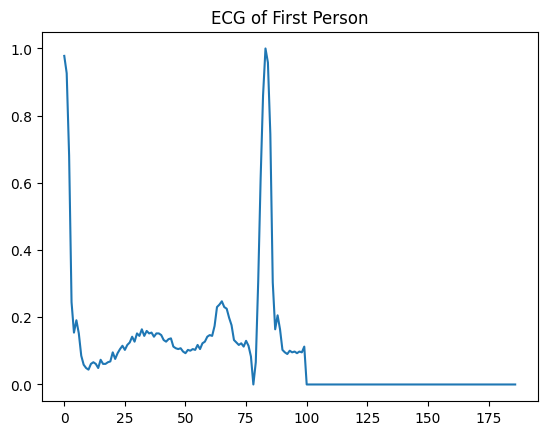

In [55]:
mit_train.iloc[0, :187].plot(title='ECG of First Person')

In [56]:
# generate a random integer
n = random_index = np.random.randint(100)

ecg_0 = mit_train.loc[mit_train[187]==0, :].iloc[n,:187]
ecg_1 = mit_train.loc[mit_train[187]==1, :].iloc[n,:187]
ecg_2 = mit_train.loc[mit_train[187]==2, :].iloc[n,:187]
ecg_3 = mit_train.loc[mit_train[187]==3, :].iloc[n,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'SPB': ecg_1,
                       'PVC': ecg_2,
                       'UB': ecg_3})

In [57]:
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

## Data Preprocessing

In [58]:
# from imblearn.over_sampling import RandomOverSampler

# data = mit_train.iloc[:, :187]
# labels = mit_train.iloc[:, 187]

# # Initialize RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# # Resample the data
# data_resampled, labels_resampled = ros.fit_resample(data, labels)

# train_df = pd.concat([data_resampled, labels_resampled], axis=1)

# train_df.shape

In [59]:
# from imblearn.under_sampling import RandomUnderSampler

# data = mit_train.iloc[:, :187]
# labels = mit_train.iloc[:, 187]

# # Initialize RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Resample the data (under-sampling)
# data_resampled, labels_resampled = rus.fit_resample(data, labels)

# train_df = pd.concat([data_resampled, labels_resampled], axis=1)

# train_df.shape

In [60]:
from sklearn.utils import resample

df_1=mit_train[mit_train[187]==1]
df_2=mit_train[mit_train[187]==2]
df_3=mit_train[mit_train[187]==3]
df_0=(mit_train[mit_train[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample])

train_df.shape

(80000, 188)

In [61]:
labels = {
    0: "Normal",
    1: "SPB",
    2: "PVC",
    3: "UB"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label After Balancing"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :187],
                                                train_df.iloc[:, 187],
                                                test_size= 0.2,
                                                stratify=train_df.iloc[:, 187],
                                                random_state=42)

x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [63]:
# Select an array of data instead of dataframe
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

In [64]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (64000, 187)
y_train shape:  (64000,)
x_val shape:  (16000, 187)
y_val shape:  (16000,)
x_test shape:  (21730, 187)
y_test shape:  (21730,)


## Create The Model

In [65]:
# Reshape datasets to use them in CNN 
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_val = x_val.reshape(x_val.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)

In [66]:
import tensorflow as tf

# Converts a class vector (integers) to binary class matrix (one hot encoder).

y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [67]:
# See some samples of data
print(y_train[-1])
print(y_val[-1])
print(y_test[-1])

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


In [68]:
# Check the dataset dimensions again 
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (64000, 187, 1)
y_train shape:  (64000, 4)
x_val shape:  (16000, 187, 1)
y_val shape:  (16000, 4)
x_test shape:  (21730, 187, 1)
y_test shape:  (21730, 4)


### CNN + LSTM Model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPool1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dropout, GRU
from keras import regularizers

In [70]:
model_cnn_lstm = Sequential([
    Input(shape=(x_train.shape[1:]), name="input_layer"),

    Conv1D(128, kernel_size=7, activation='relu', kernel_initializer='he_normal', padding="same", name="conv1d_1"),
    BatchNormalization(name="batch_norm_1"),
    MaxPool1D(pool_size=3, strides=2, padding="same", name="max_pool_1"),
    Dropout(0.2, name="dropout_1"),

    Conv1D(128, kernel_size=5, activation='relu', kernel_initializer='he_normal', padding="same", name="conv1d_2"),
    BatchNormalization(name="batch_norm_2"),
    MaxPool1D(pool_size=2, strides=2, padding="same", name="max_pool_2"),
    Dropout(0.2, name="dropout_2"),

    Conv1D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding="same", name="conv1d_3"),
    BatchNormalization(name="batch_norm_3"),
    MaxPool1D(pool_size=2, strides=2, padding="same", name="max_pool_3"),
    Dropout(0.2, name="dropout_3"),

    LSTM(128, return_sequences=True, activation="tanh", kernel_regularizer=regularizers.l2(0.01), name="lstm_1"),
    Dropout(0.3, name="dropout_4"),

    LSTM(64, activation="tanh", kernel_regularizer=regularizers.l2(0.01), name="lstm_2"),
    Dropout(0.3, name="dropout_5"),

    Flatten(name="flatten"),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), name="dense_1"),
    Dropout(0.4, name="dropout_6"),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), name="dense_2"),
    Dense(4, activation='softmax', name="output_layer")
])

model_cnn_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 187, 128)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 187, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling1D)       │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 94, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 94, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling1D)       │ (None, 47, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 47, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 47, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 47, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_3 (MaxPooling1D)       │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,716 (1.27 MB)

 Trainable params: 330,948 (1.26 MB)

 Non-trainable params: 768 (3.00 KB)

In [71]:
model_cnn_lstm.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [72]:
# callbacks = [EarlyStopping(monitor='val_loss', 
#                            patience=8),
#              ReduceLROnPlateau(patience=20,
#                                monitor='val_loss',
#                                min_lr=1e-6,
#                                cool_down=20),
#              ModelCheckpoint(filepath=r'C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras', 
#                              monitor='val_loss',
#                              save_best_only=True)]

# from chat-gpt
callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=20,          # Let model explore longer before stopping
        restore_best_weights=True  # Restore weights from best epoch
    ),
    ReduceLROnPlateau(
        monitor='val_loss', 
        patience=5,           # Reduce LR faster if no improvement
        factor=0.5,           # Cut LR in half
        min_lr=1e-6,
        cooldown=3            # Wait before reducing again
    ),
    ModelCheckpoint(
        filepath=r'C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras', 
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

In [ ]:
history = model_cnn_lstm.fit(x_train, y_train, 
                        epochs=40, 
                        callbacks=callbacks, 
                        batch_size=32, 
                        validation_data=(x_val, y_val),
                       verbose=1)

Epoch 1/40
1997/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7131 - loss: 1.4517
Epoch 1: val_loss improved from inf to 0.41773, saving model to C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7133 - loss: 1.4504 - val_accuracy: 0.9018 - val_loss: 0.4177 - learning_rate: 0.0010
Epoch 2/40
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9027 - loss: 0.4005
Epoch 2: val_loss improved from 0.41773 to 0.37579, saving model to C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9027 - loss: 0.4005 - val_accuracy: 0.9179 - val_loss: 0.3758 - learning_rate: 0.0010
Epoch 3/40
1999/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9204 - loss: 0.3464
Epoch 3: val_loss improved from 0.37579 to 0.30765, saving model to C:\Users\newsh\Downloads\Behrouz\Data

In [ ]:
# Plot loss and accuracy of the model
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Comprison between the accuracy of model on train and validation datasets
train_score = model_cnn_lstm.evaluate(x_train, y_train)
validation_score = model_cnn_lstm.evaluate(x_val, y_val)

print('Accuracy Train data: ', train_score[1])
print('Accuracy Validation data: ', validation_score[1])

### Predict on Test Dataset

In [ ]:
# Predict on the test data
y_pred = model_cnn_lstm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = [
    "Normal",
    "SPB",
    "PVC",
    "UB"
]

# Compute confusion matrix
cm = confusion_matrix(y_test_labels,y_pred_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
            xticklabels=class_names, 
            yticklabels=class_names,
            )

plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
model_cnn_lstm.save("ECG.h5")

In [ ]:
import tensorflowjs as tfjs

# บันทึกโมเดลไปยังโฟลเดอร์สำหรับใช้งานบนเว็บ
tfjs.converters.save_keras_model(model_cnn_lstm, "web_model")

In [ ]:
!pip install tensorflowjs